# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

We will use pandas to directly read data from Google finance!

### The Imports

In [85]:
# from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
from pandas_datareader import data, wb

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** We get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

In [67]:
BAC=data.DataReader("BAC",'google','2006-01-01','2016-01-01')
C=data.DataReader("C",'google','2006-01-01','2016-01-01')
GS=data.DataReader("GS",'google','2006-01-01','2016-01-01')
JPM=data.DataReader("JPM",'google','2006-01-01','2016-01-01')
MS=data.DataReader("MS",'google','2006-01-01','2016-01-01')
WFC=data.DataReader("WFC",'google','2006-01-01','2016-01-01')

** We create a list of the ticker symbols (as strings) in alphabetical order**

In [68]:
tickers=['BAC','GS','C','JPM','MS','WFC']
tickers.sort()
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [69]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)

** Set the column name levels**

In [70]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [71]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing
** What is the max Close price for each bank's stock throughout the time period?**

In [72]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [73]:
#Create list of ticker names with 'Return' appended at the end
mystring=' Return'
tickers=[s + mystring for s in tickers]

** We can use pandas pct_change() method on the Close column to create a column representing this return value.**

In [75]:
returns=pd.DataFrame()
returns=bank_stocks.xs(key='Close',level='Stock Info',axis=1).pct_change()
returns.columns=tickers
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe**

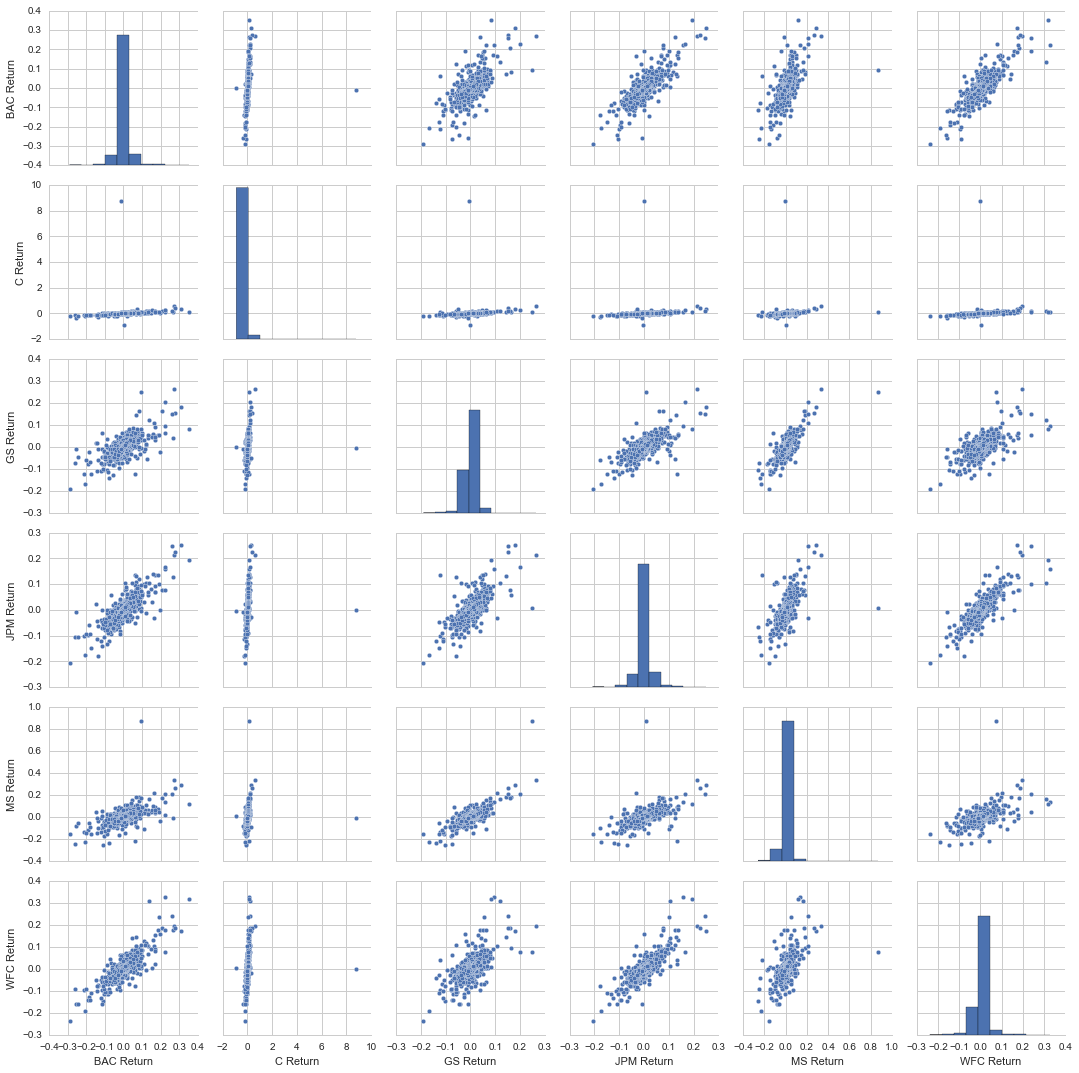

In [76]:
import seaborn as sns
sns.pairplot(returns[1:],dropna=True)

** What dates each bank stock had the best and worst single day returns.4 of the banks share the same day for the worst drop**

In [77]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another**

In [80]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

** Based on the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [81]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [82]:
returns[returns.index.year==2015].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Distribution of 2015 returns for Morgan Stanley **

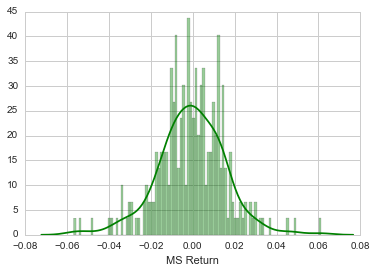

In [83]:
sns.set_style('whitegrid')
sns.distplot(returns['MS Return'][(returns.index.year==2015)],bins=100,color='green')

** Distribution of 2008 returns for CitiGroup **

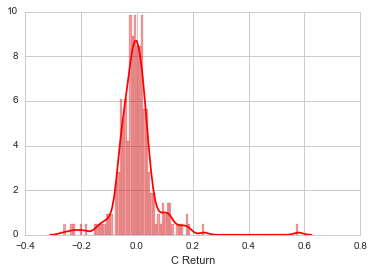

In [84]:
sns.set_style('whitegrid')
sns.distplot(returns['C Return'][(returns.index.year==2008)],bins=100,color='red')

** Create a line plot showing Close price for each bank for the entire index of time.**

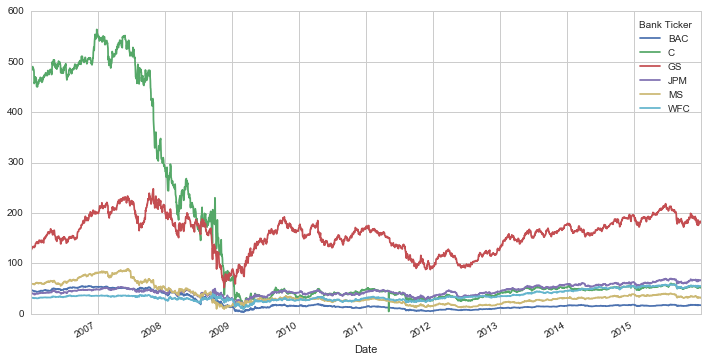

In [88]:
bank_stocks.xs(key='Close',level='Stock Info',axis=1).plot(kind='line',figsize=(12,6))
plt.legend(loc=1,title='Bank Ticker')

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** We will plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

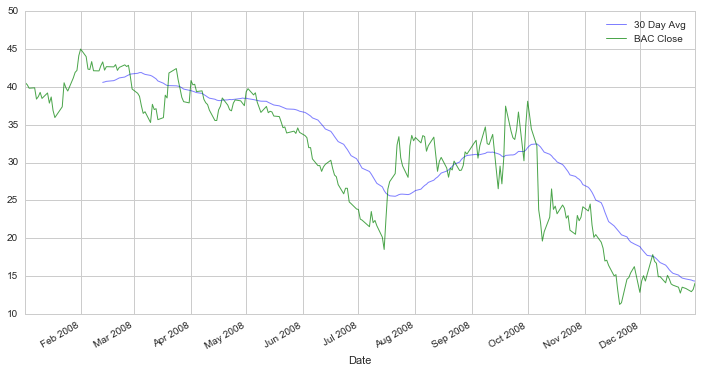

In [93]:
sns.set_style('whitegrid')
bank_stocks['BAC']['Close'][bank_stocks.index.year==2008].rolling(window=30).mean().plot(
    kind='line',color='blue',lw=1,alpha=0.5,label='30 Day Avg',figsize=(12,6))
bank_stocks['BAC']['Close'][bank_stocks.index.year==2008].plot(
    kind='line',color='green',lw=1,alpha=0.7,label='BAC Close')
plt.legend(loc=1)

** Create a heatmap of the correlation between the stocks Close Price.**

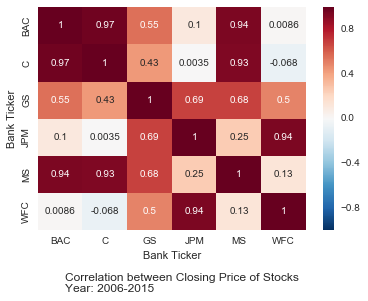

In [101]:
sns.heatmap(bank_stocks.xs(key='Close',level='Stock Info',axis=1).corr(),annot=True)
plt.title(r"Correlation between Closing Price of Stocks"+"\n"+"Year: 2006-2015",loc='left',position=(0.1,-0.3))

** We will plot a clustermap to cluster the correlations together:**

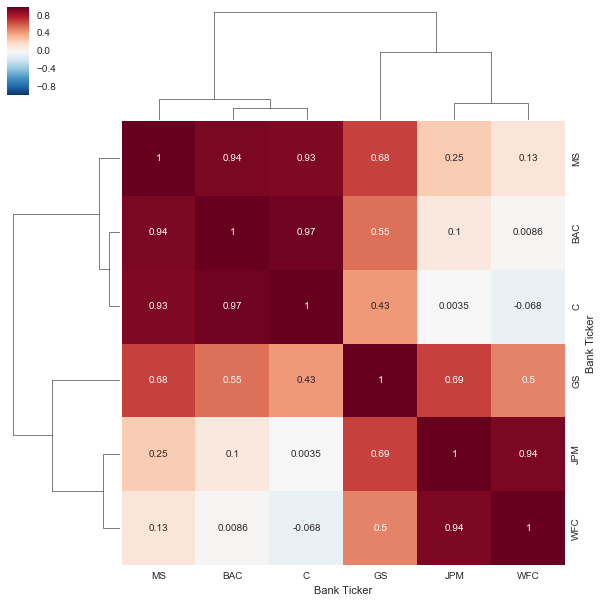

In [102]:
sns.clustermap(bank_stocks.xs(key='Close',level='Stock Info',axis=1).corr(),annot=True)

** We will Use .iplot to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [103]:
bank_stocks['BAC'][bank_stocks.index.year==2015].iplot(kind='candle')

**We now create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [104]:
bank_stocks['MS'][bank_stocks.index.year==2015].ta_plot(study='sma',period=[30,60])

**Creating a Bollinger Band Plot for Bank of America for the year 2015.**

In [105]:
bank_stocks['BAC'][bank_stocks.index.year==2015].ta_plot(study='boll')

# Thank You!